In [ ]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('sample_data/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
# I have made use of Github repositories and AI for writing the code and execution. 
# Made use of websites such as Stackoverflow (https://stackoverflow.com/) 
# Web3schools(https://www.w3schools.com/)for learning and understanding concepts  

# The Github repositories that were used:  
# (https://github.com/arijitiiest/UCI-Human-Activity-Recognition/blob/master/UCI-HAR-Deep-Learning.ipynb)
# (https://github.com/GopiSumanth/UCI-Human-Activity-Recognition/blob/master/UCI_Human_Activity_Recognition.ipynb)
# (https://github.com/Eshan-Agarwal/Human-Activity-Recognition------UCI/blob/master/HAR_PREDICTION_MODELS.ipynb)
# (https://github.com/srvds/Human-Activity-Recognition/blob/master/HAR_EDA.ipynb)

In [ ]:
# Obtain the Train Data

# To find all the feature names and identify duplicates from the dataset
features = pd.read_csv('sample_data/features.txt', delim_whitespace=True, header=None)
feature_names = features[1].tolist()

# To check all the duplicate feature names from the dataset
duplicate_features = [item for item in set(feature_names) if feature_names.count(item) > 1]
print(f"Number of Duplicate Features: {len(duplicate_features)}")
print(f"Duplicate Feature Names: {duplicate_features}")

# Making the feature names unique and prepare it to machine learning algorithms
# and appending an index to duplicates
unique_feature_names = {}
cleaned_feature_names = []

for feature in feature_names:
    if feature in unique_feature_names:
        # If feature already exists, increment count and append
        unique_feature_names[feature] += 1
        new_name = f"{feature}_{unique_feature_names[feature]}"
    else:
        # If feature is not in the dictionary, initialize its count
        unique_feature_names[feature] = 0
        new_name = feature

    # Append the (possibly modified) name to the cleaned list
    cleaned_feature_names.append(new_name)

# Use `cleaned_feature_names` as column names
X_train = pd.read_csv('sample_data/X_train.txt', delim_whitespace=True, header=None, names=cleaned_feature_names)

# Add subject column to the DataFrame
X_train['subject'] = pd.read_csv('sample_data/subject_train.txt', header=None).squeeze()

# Load y_train data (activity labels) into a DataFrame
y_train = pd.read_csv('sample_data/y_train.txt', header=None, names=['Activity']).squeeze()

# Map numerical activity labels to descriptive activity names
activity_labels = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
                   4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_train_labels = y_train.map(activity_labels)

# Combine the features, subject, and activity labels into a single DataFrame
train = X_train.copy()
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

# Display a random sample of the combined DataFrame
print(train.sample(5))

<ipython-input-2-5b44af069302>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('sample_data/features.txt', delim_whitespace=True, header=None)
<ipython-input-2-5b44af069302>:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('sample_data/X_train.txt', delim_whitespace=True, header=None, names=cleaned_feature_names)


Number of Duplicate Features: 42
Duplicate Feature Names: ['fBodyGyro-bandsEnergy()-1,8', 'fBodyGyro-bandsEnergy()-41,48', 'fBodyGyro-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyGyro-bandsEnergy()-17,24', 'fBodyGyro-bandsEnergy()-17,32', 'fBodyAccJerk-bandsEnergy()-25,32', 'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccJerk-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyGyro-bandsEnergy()-33,48', 'fBodyGyro-bandsEnergy()-49,56', 'fBodyGyro-bandsEnergy()-1,16', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyGyro-bandsEnergy()-49,64', 'fBodyAccJerk-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyGyro-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bands

In [ ]:
train.shape

(7352, 564)

In [ ]:
# Obtain the test data

# Load X_test data (sensor readings) into a DataFrame
X_test = pd.read_csv('sample_data/X_test.txt', delim_whitespace=True, header=None)

# Add subject column to the DataFrame (without using squeeze)
X_test['subject'] = pd.read_csv('sample_data/subject_test.txt', header=None).iloc[:, 0]

# Load y_test data (activity labels) into a DataFrame (without using squeeze)
y_test = pd.read_csv('sample_data/y_test.txt', header=None, names=['Activity']).iloc[:, 0]

# Map numerical activity labels to descriptive activity names
activity_labels = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
                   4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_test_labels = y_test.map(activity_labels)

# Combine the features, subject, and activity labels into a single DataFrame
test = X_test.copy()
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

# Display a random sample of the combined DataFrame
print(test.sample(5))


<ipython-input-4-ea32d46a0356>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('sample_data/X_test.txt', delim_whitespace=True, header=None)


             0         1         2         3         4         5         6  \
2793  0.275510 -0.016606 -0.105949 -0.993924 -0.986858 -0.989743 -0.994372   
2808  0.283980 -0.043348 -0.100011 -0.990886 -0.916488 -0.970491 -0.991875   
491   0.277104 -0.013321 -0.114933 -0.995661 -0.858071 -0.898004 -0.996414   
194   0.284312 -0.015594 -0.085977 -0.988462 -0.980783 -0.968513 -0.988885   
71    0.294933 -0.018149 -0.108703 -0.971493 -0.988877 -0.993560 -0.972585   

             7         8         9  ...       554       555       556  \
2793 -0.986683 -0.988767 -0.939327  ...  0.079512 -0.131179  0.126812   
2808 -0.905712 -0.974654 -0.933341  ...  0.024684 -0.022662 -0.164474   
491  -0.838376 -0.880714 -0.940090  ...  0.079767 -0.005646  0.187234   
194  -0.982061 -0.968268 -0.932050  ... -0.237895  0.352618  0.434478   
71   -0.988773 -0.994152 -0.917240  ...  0.133837 -0.551786  0.133860   

           557       558       559       560  subject  Activity  ActivityName  
2793 -0.2802

In [ ]:
test.shape

(2947, 564)

In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

# Checking for NaN/null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

No of duplicates in train: 0
No of duplicates in test : 0
We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


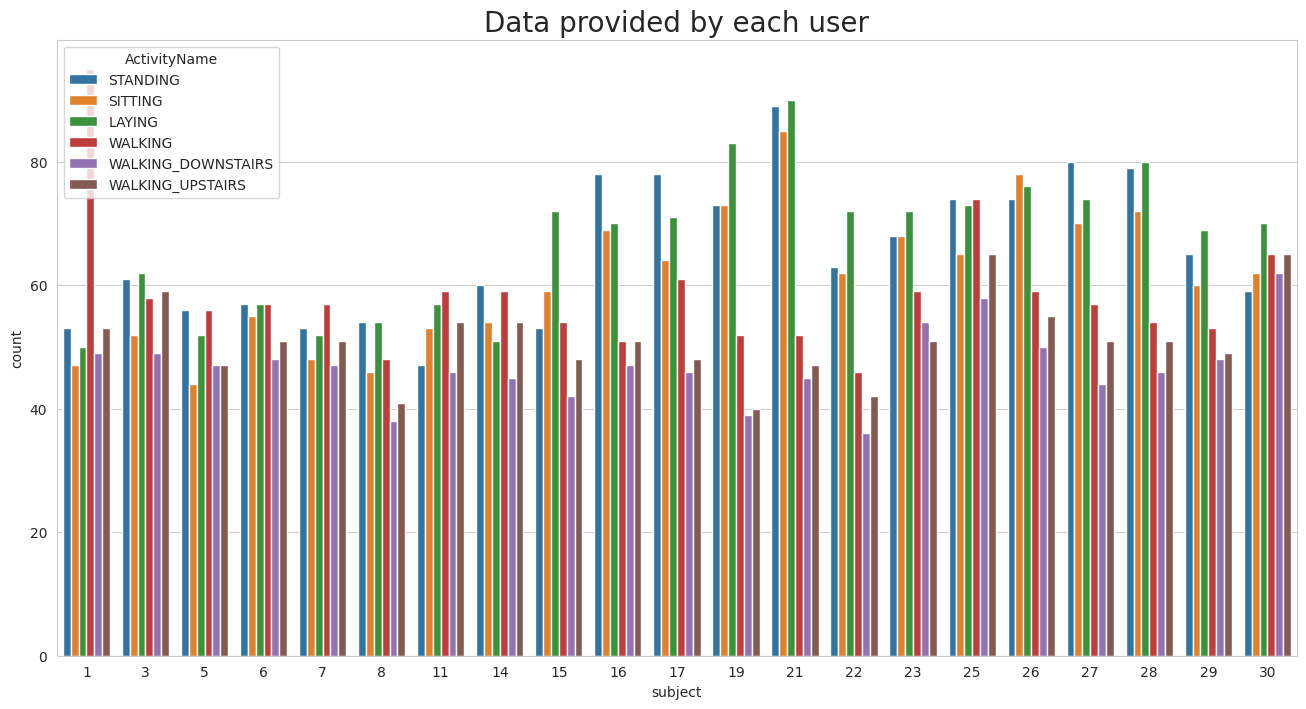

In [ ]:
# Visualising to check the data imbalance
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

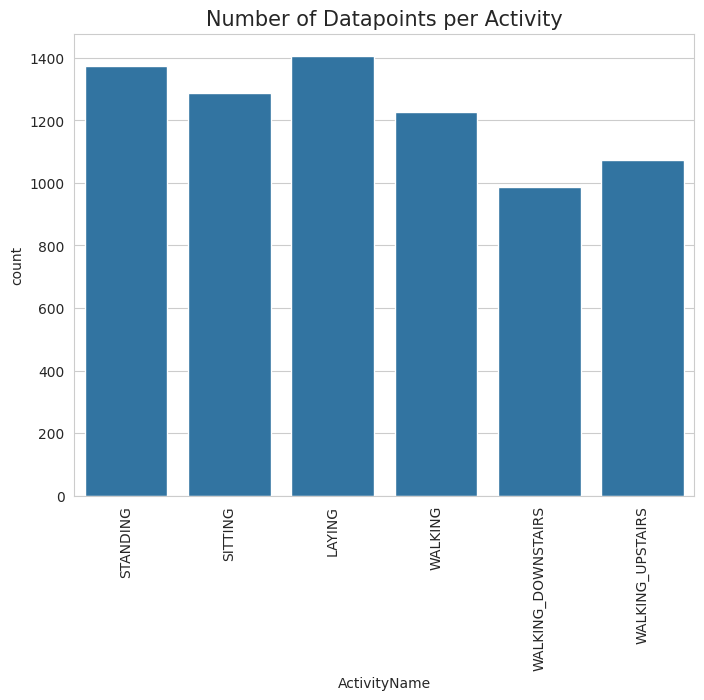

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size for better visibility
plt.title('Number of Datapoints per Activity', fontsize=15)
sns.countplot(x='ActivityName', data=train)  # Explicitly specify 'x' and 'data' parameters
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [ ]:
# Select only the numeric columns from the dataset
numeric_features = train.select_dtypes(include=[np.number])

# Calculate the correlation with 'Activity' (which is numeric)
correlation_with_activity = numeric_features.corr()['Activity'].sort_values(ascending=False)

# Display the top 10 correlated features
print(correlation_with_activity.head(10))

Activity                 1.000000
tBodyAccJerk-min()-Y     0.788595
tBodyAccJerk-min()-X     0.786288
tBodyAcc-min()-Y         0.771205
tBodyGyro-min()-Z        0.758051
tBodyAcc-min()-X         0.752129
tBodyGyroJerk-min()-X    0.734135
tBodyAccJerk-min()-Z     0.729956
tBodyAcc-min()-Z         0.703166
tBodyGyro-min()-Y        0.700111
Name: Activity, dtype: float64


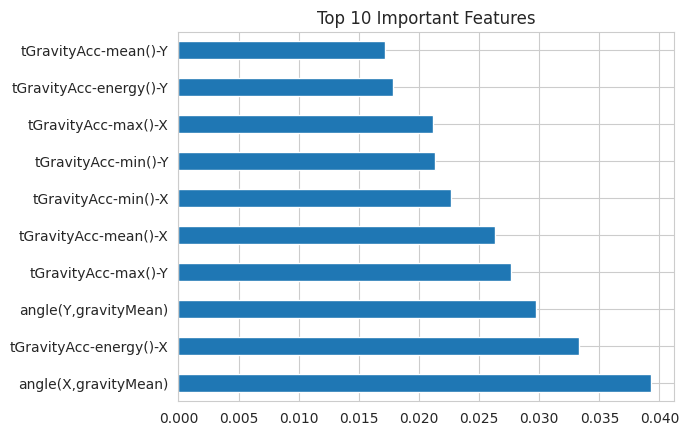

In [ ]:
#most important feature
from sklearn.ensemble import RandomForestClassifier

# Prepare feature matrix and target variable
X = train.drop(['Activity', 'ActivityName', 'subject'], axis=1)
y = train['Activity']

# Train a RandomForest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
#variance analysis to identify low-variance features
# Calculate variance of each feature
variance = train.iloc[:, :-3].var()

# Identify features with low variance
low_variance_features = variance[variance < 0.1].index.tolist()
print(f'Low Variance Features: {low_variance_features}')

#visualisation of variance analysis
plt.figure(figsize=(15, 5))
sns.histplot(variance, bins=50, kde=True)
plt.title('Variance Distribution of Features')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.023s...
[t-SNE] Computed neighbors for 7352 samples in 2.445s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.033s
[t-SNE] Iteration 50: error = 119.3317108, gradient norm = 0.0430003 (50 iterations in 6.068s)
[t-SNE] Iteration 100: error = 105.1651306, gradient norm = 0.0239006 (50 iterations in 

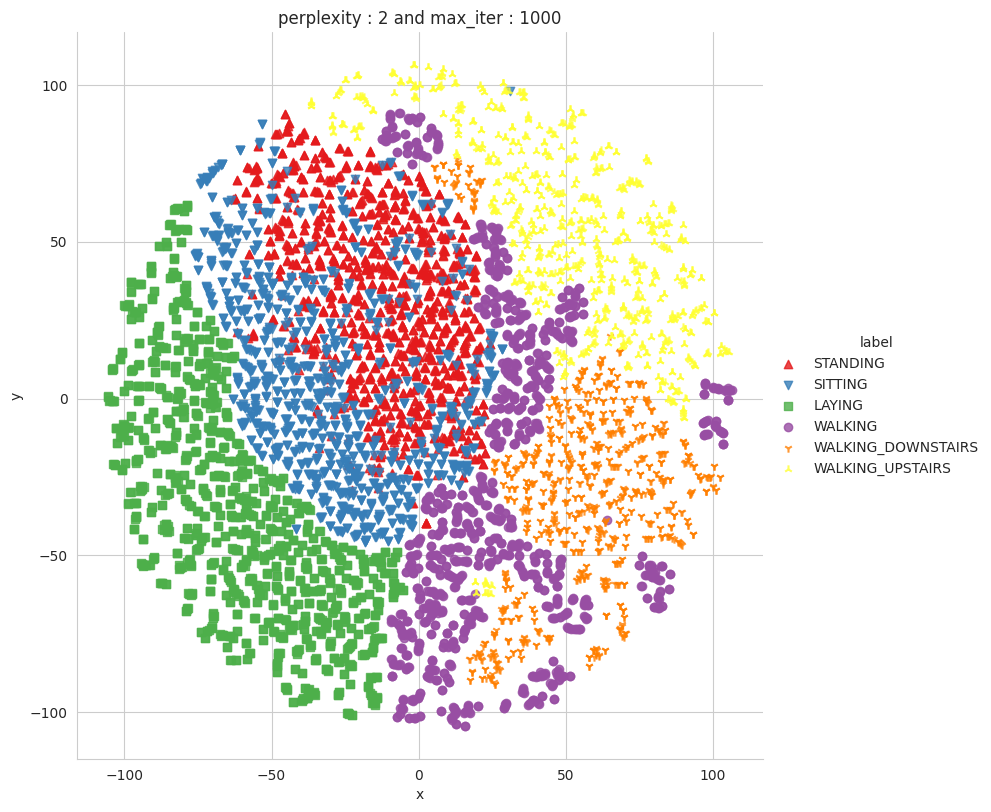

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 2.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 107.1318054, gradient norm = 0.0395178 (50 iterations in 7.772s)
[t-SNE] Iteration 100: error = 95.6962585, gradient norm = 0.0154318 (50 iteration

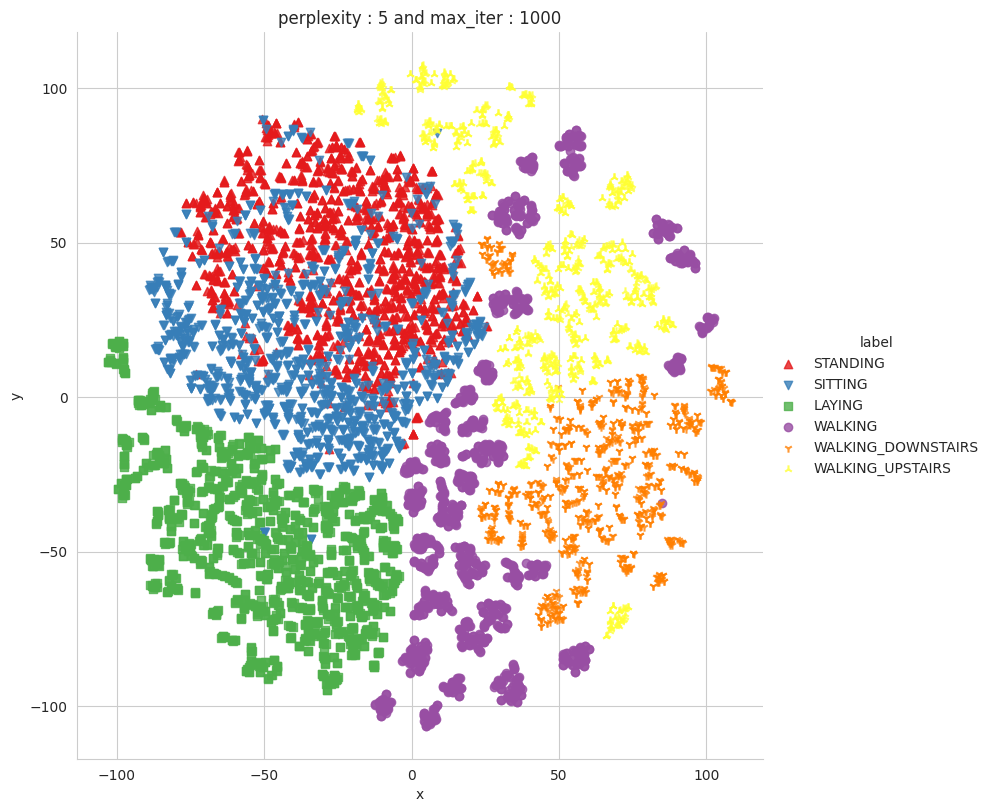

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.021s...
[t-SNE] Computed neighbors for 7352 samples in 2.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 97.8923492, gradient norm = 0.0357802 (50 iterations in 8.117s)
[t-SNE] Iteration 100: error = 88.9347000, gradient norm = 0.0110882 (50 iteration

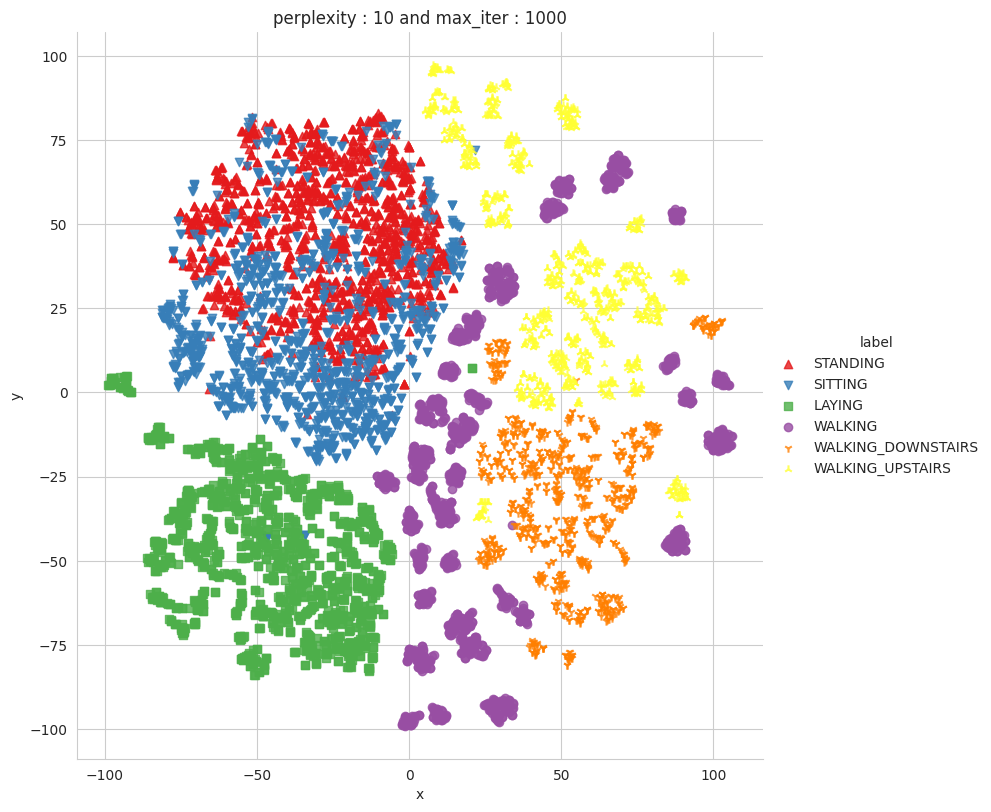

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.021s...
[t-SNE] Computed neighbors for 7352 samples in 2.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.134s
[t-SNE] Iteration 50: error = 89.2836990, gradient norm = 0.0312426 (50 iterations in 7.535s)
[t-SNE] Iteration 100: error = 82.9684219, gradient norm = 0.0077232 (50 iteration

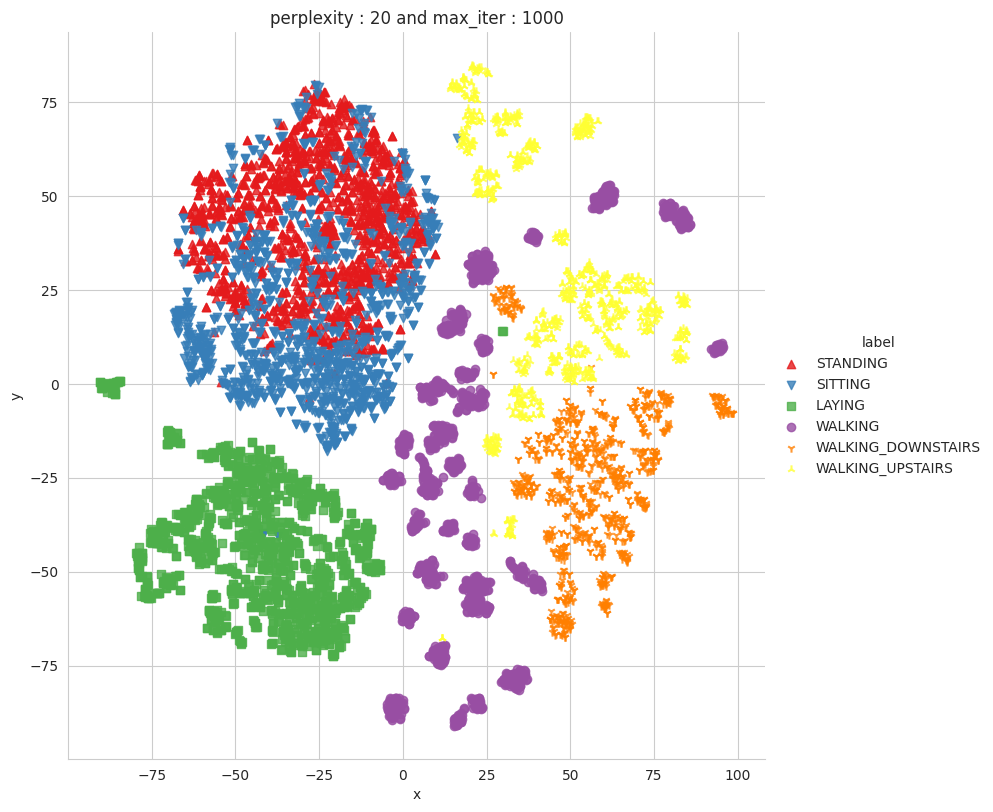

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 2.851s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.333s
[t-SNE] Iteration 50: error = 78.8209839, gradient norm = 0.0245477 (50 iterations in 12.286s)
[t-SNE] Iteration 100: error = 75.2248840, gradient norm = 0.0054186 (50 iterati

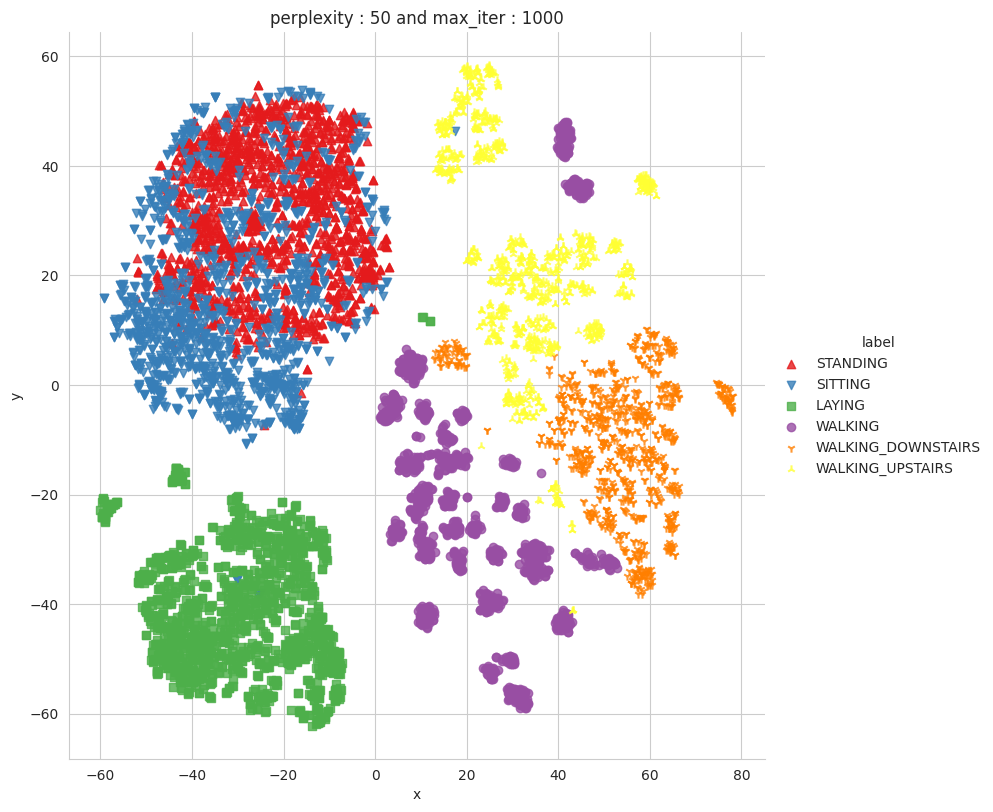

Done


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        # Replacing 'size' with 'height' to control the plot size
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [ ]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [ ]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):


    # to store results at various phases
    results = dict()

    # time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred


    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))


    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))

    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    results['model'] = model

    return results

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Done 
 

training_time(HH:MM:SS.ms) - 0:00:34.350608


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015197


---------------------
|      Accuracy      |
---------------------

    0.9586019681031558


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


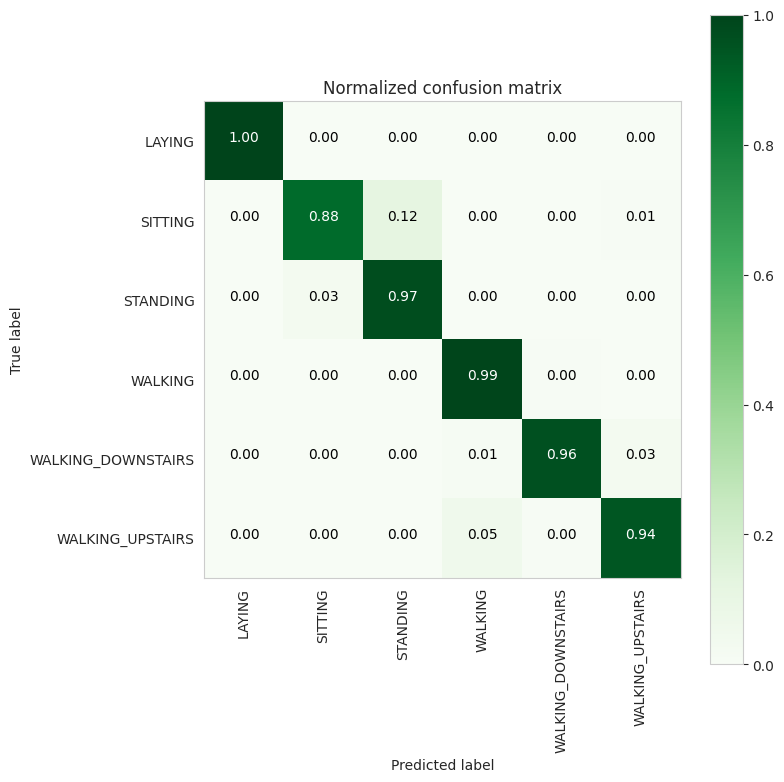

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:09:15.099392


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.047968


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


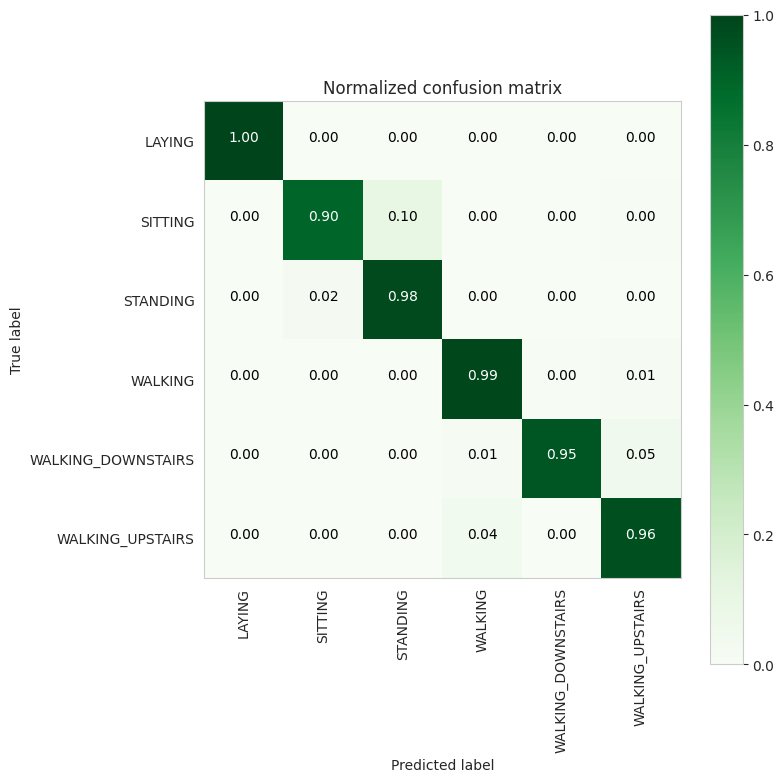

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
!pip install scikeras

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Step 1: Load the dataset
data = pd.read_csv("augmented_dataset.csv")

# Step 2: Prepare features and target variable
X = data.drop(['Activity'], axis=1)
y = data['Activity']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Reshape the data for LSTM [samples, time steps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Step 6: Define a function to create the LSTM model
def create_lstm_model(optimizer='adam', neurons=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  # Assuming multi-class classification
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Set up hyperparameter tuning with parameters defined for KerasClassifier
# Pass dropout_rate, neurons, and other parameters to the KerasClassifier constructor
model = KerasClassifier(model=create_lstm_model, verbose=0, dropout_rate=0.2, neurons=50, optimizer='adam')

# Define the hyperparameter grid
# Remove 'dropout_rate' and 'neurons' from param_grid as they are already defined in the KerasClassifier
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'model__neurons': [50, 100], # Access model parameters using 'model__' prefix
    'model__dropout_rate': [0.1, 0.2], # Access model parameters using 'model__' prefix
    'epochs': [50, 100],
    'batch_size': [16, 32]
}

# Step 8: Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train)

# Step 9: Print the best parameters and score
print("\nBest Hyperparameters:\n", grid_result.best_params_)
print("Best Score: {:.2f}%".format(grid_result.best_score_ * 100))


# Step 10: Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of LSTM with Augmented dataset: {:.2f}%".format(accuracy * 100))

# Step 11: Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes=np.unique(y), title='Confusion Matrix of LSTM')

# Step 13: Save the model
joblib.dump(best_model.model, 'lstm_model.joblib')
print("\nLSTM Model saved successfully.")

Augmented training data shape: (22056, 1, 561)
Augmented training labels shape (categorical): (22056, 6)
Augmented test data shape: (8841, 1, 561)
Augmented test labels shape (categorical): (8841, 6)
Evaluating LSTM Model...
Epoch 1/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8605 - loss: 0.4599
Epoch 2/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9782 - loss: 0.0677
Epoch 3/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9867 - loss: 0.0408
Epoch 4/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9897 - loss: 0.0297
Epoch 5/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9920 - loss: 0.0250
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9501187648456056
Confusion Matrix:
 [[1566    0   45    0    0    0]
 [   0 1296  174    0    0    3]
 [   0   61 1535    0    0    0]
 [   0    0    0 1464   12   12]
 [   0    0    0   15 1171   74]
 [   0    0    1   38    6 1368]]


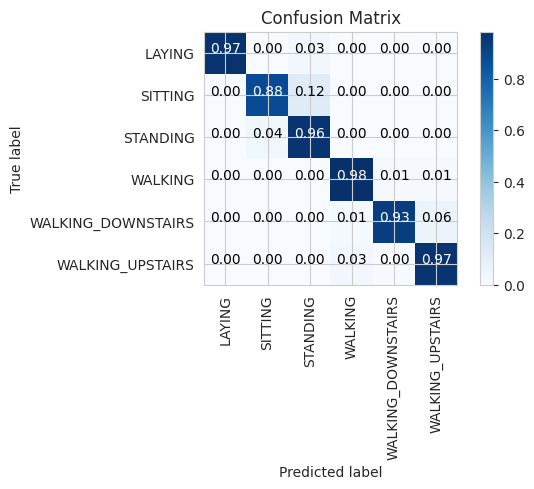

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1611
           1       0.96      0.88      0.92      1473
           2       0.87      0.96      0.92      1596
           3       0.97      0.98      0.97      1488
           4       0.98      0.93      0.96      1260
           5       0.94      0.97      0.95      1413

    accuracy                           0.95      8841
   macro avg       0.95      0.95      0.95      8841
weighted avg       0.95      0.95      0.95      8841

Evaluating SVM Model...
Accuracy: 0.9565659993213438
Confusion Matrix:
 [[1611    0    0    0    0    0]
 [   9 1314  147    0    0    3]
 [   0   59 1537    0    0    0]
 [   0    0    0 1461   22    5]
 [   0    0    0   16 1165   79]
 [   0    0    0   38    6 1369]]


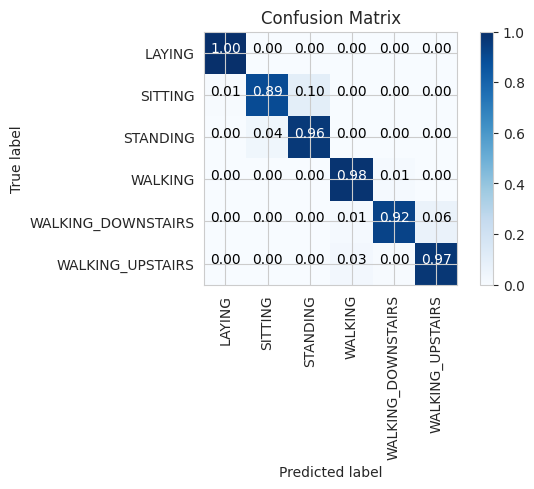

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1611
           1       0.96      0.89      0.92      1473
           2       0.91      0.96      0.94      1596
           3       0.96      0.98      0.97      1488
           4       0.98      0.92      0.95      1260
           5       0.94      0.97      0.95      1413

    accuracy                           0.96      8841
   macro avg       0.96      0.96      0.96      8841
weighted avg       0.96      0.96      0.96      8841



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
import itertools
import matplotlib.pyplot as plt

# Assume X_train, X_test, y_train, y_test are already defined and available in your environment

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for augmentation (needed for time series data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])  # (samples, time steps, features)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# 3. Rotation: Rotate the data points randomly
def rotate(X, angle_range=(-10, 10)):
    angles = np.random.uniform(low=angle_range[0], high=angle_range[1], size=(X.shape[0],))
    rotated_X = []
    for i in range(X.shape[0]):
        angle = np.deg2rad(angles[i])
        rotation_matrix = np.eye(X.shape[2])  # Initialize with identity matrix
        for j in range(0, X.shape[2], 2):  # Rotate each pair of features
            if j + 1 < X.shape[2]:  # Check if there's another feature to pair with
                cos_val, sin_val = np.cos(angle), np.sin(angle)
                rotation_block = np.array([[cos_val, -sin_val], [sin_val, cos_val]])
                # Correct the slicing to assign the rotation_block to a 2x2 submatrix
                rotation_matrix[j:j+2, j:j+2] = rotation_block # The issue was in this line

        rotated_time_steps = []
        for t in range(X.shape[1]):
            X_aug = np.dot(X[i, t, :], rotation_matrix)
            rotated_time_steps.append(X_aug)
        rotated_X.append(rotated_time_steps)

    return np.array(rotated_X)  # Output is 3D (samples, time steps, features

# 4. Scaling: Scale the data with random factors
def scaling(X, sigma=0.1):
    scaling_factors = np.random.normal(loc=1.0, scale=sigma, size=(X.shape[0], X.shape[1], 1))
    return X * scaling_factors  # Output is still 3D (samples, time steps, features)

# Apply rotation and scaling to the data
X_rotated_train = rotate(X_train_reshaped)
X_rotated_test = rotate(X_test_reshaped)

X_scaled_train = scaling(X_train_reshaped)
X_scaled_test = scaling(X_test_reshaped)

# Combine the augmented datasets with original data for training
X_augmented_train = np.vstack([X_train_reshaped, X_rotated_train, X_scaled_train])
X_augmented_test = np.vstack([X_test_reshaped, X_rotated_test, X_scaled_test])

# Replicate the labels for the augmented data
y_augmented_train = np.tile(y_train, (3,))  # Original, rotated, and scaled
y_augmented_test = np.tile(y_test, (3,))

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_augmented_train_encoded = label_encoder.fit_transform(y_augmented_train)
y_augmented_test_encoded = label_encoder.transform(y_augmented_test)

# One-Hot Encoding for LSTM
num_classes = len(np.unique(y_augmented_train_encoded))
y_augmented_train_categorical = to_categorical(y_augmented_train_encoded, num_classes)
y_augmented_test_categorical = to_categorical(y_augmented_test_encoded, num_classes)

# Print the augmented dataset shapes
print("Augmented training data shape:", X_augmented_train.shape)
print("Augmented training labels shape (categorical):", y_augmented_train_categorical.shape)
print("Augmented test data shape:", X_augmented_test.shape)
print("Augmented test labels shape (categorical):", y_augmented_test_categorical.shape)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, class_labels, is_neural_network=True):
    if is_neural_network:
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)
    else:
        model.fit(X_train, y_train)
        y_pred_classes = model.predict(X_test)
        y_test_classes = y_test

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f'Accuracy: {accuracy}')

    cm = confusion_matrix(y_test_classes, y_pred_classes)
    print('Confusion Matrix:\n', cm)

    plt.figure()
    plot_confusion_matrix(cm, classes=class_labels, normalize=True)
    plt.show()

    print(classification_report(y_test_classes, y_pred_classes))

# Adjust LSTM Model Creation
def create_lstm_model(units=50, dropout_rate=0.2):  # Default values for units and dropout_rate
    model = Sequential()
    model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # Using num_classes directly
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the LSTM model
lstm_model = create_lstm_model(units=50, dropout_rate=0.2)

# SVM Model requires 2D input, so we need to reshape the augmented data for SVM
X_augmented_train_2d = X_augmented_train.reshape(X_augmented_train.shape[0], -1)
X_augmented_test_2d = X_augmented_test.reshape(X_augmented_test.shape[0], -1)

# Create the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Evaluate LSTM model using augmented training data
print("Evaluating LSTM Model...")
evaluate_model(lstm_model, X_augmented_train, y_augmented_train_categorical, X_augmented_test, y_augmented_test_categorical, class_labels=label_encoder.classes_)

# Evaluate SVM model using augmented training data
print("Evaluating SVM Model...")
evaluate_model(svm_model, X_augmented_train_2d, y_augmented_train_encoded, X_augmented_test_2d, y_augmented_test_encoded, class_labels=label_encoder.classes_, is_neural_network=False)


In [ ]:
import os

# List the contents of the sample_data folder
print(os.listdir('/content/sample_data/reduced data'))

['red_body_gyro_x_test.txt', 'red_total_acc_y_test.txt', 'red_y_test.csv', 'red_body_acc_z_train.txt', 'red_body_acc_z_test.txt', 'red_X_test.csv', 'red_body_acc_x_test.txt', 'red_subject_test.csv', 'red_subject_train.csv', 'red_body_gyro_y_test.txt', 'red_body_acc_y_test.txt', 'red_total_acc_z_train.txt', 'red_body_gyro_x_train.txt', 'red_total_acc_x_test.txt', 'red_total_acc_y_train.txt', 'red_body_gyro_z_train.txt', 'red_body_gyro_z_test.txt', 'red_total_acc_z_test.txt', 'red_body_acc_x_train.txt', 'red_X_train.csv', 'red_body_acc_y_train.txt', 'red_body_gyro_y_train.txt', 'red_total_acc_x_train.txt', 'red_y_train.csv']


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
Epoch: 6000, D Loss Real: [6.472707525517762e-08, 1.0], D Loss Fake: [0.19301623106002808, 0.9375], G Loss: 10.583011627197266
1/1 [==============================] - 0s 23ms/step
Epoch: 7000, D Loss Real: [0.0006059573497623205, 1.0], D Loss Fake: [0.0006540055037476122, 1.0], G Loss: 11.093887329101562
1/1 [==============================] - 0s 24ms/step
Epoch: 8000, D Loss Real: [0.0017026099376380444, 1.0], D Loss Fake: [0.0018020161660388112, 1.0], G Loss: 9.273348808288574
1/1 [==============================] - 0s 26ms/step
Epoch: 9000, D Loss Real: [0.0032622558064758778, 1.0], D Loss Fake: [0.0017059226520359516, 1.0], G Loss: 8.603140830993652
4/4 [==============================] - 0s 2ms/step
Augmented training and testing data saved as 'augmented_train_data.csv' and 'augmented_test_data.csv'.
Evaluating LSTM Model with GAN-augmented data...
Epoch 1/5
7/7 [====================

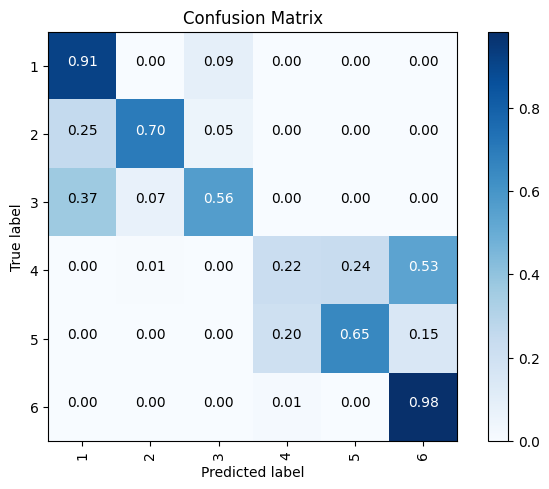

              precision    recall  f1-score   support

           0       0.62      0.91      0.74       487
           1       0.91      0.70      0.79       463
           2       0.78      0.56      0.65       413
           3       0.49      0.22      0.31       483
           4       0.75      0.65      0.69       523
           5       0.61      0.98      0.75       528

    accuracy                           0.68      2897
   macro avg       0.69      0.67      0.66      2897
weighted avg       0.69      0.68      0.66      2897

Evaluating SVM Model with GAN-augmented data...
Accuracy: 0.7908180876769072
Confusion Matrix:
 [[473   1  13   0   0   0]
 [ 88 368   7   0   0   0]
 [148  37 228   0   0   0]
 [  5   2   1 226 236  13]
 [  3   0   0  21 499   0]
 [  0   0   6   0  25 497]]


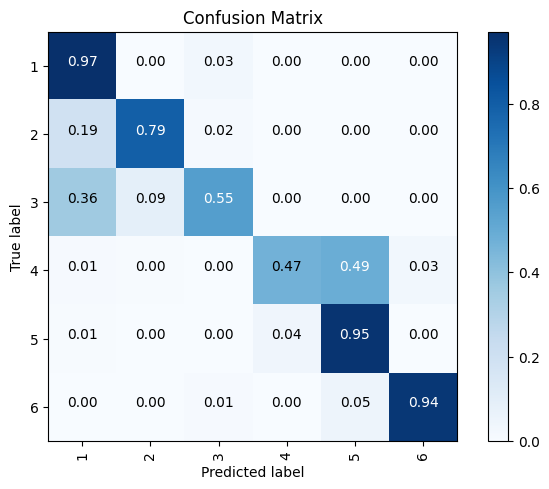

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       487
           1       0.90      0.79      0.85       463
           2       0.89      0.55      0.68       413
           3       0.91      0.47      0.62       483
           4       0.66      0.95      0.78       523
           5       0.97      0.94      0.96       528

    accuracy                           0.79      2897
   macro avg       0.83      0.78      0.78      2897
weighted avg       0.83      0.79      0.78      2897



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import itertools

# Load reduced dataset
data_folder = "/content/sample_data"
X_train = pd.read_csv(f'{data_folder}/red_X_train.csv', header=None).values
y_train = pd.read_csv(f'{data_folder}/red_y_train.csv', header=None).values.ravel()
X_test = pd.read_csv(f'{data_folder}/red_X_test.csv', header=None).values.ravel()
y_test = pd.read_csv(f'{data_folder}/red_y_test.csv', header=None).values.ravel()

# Reshape X_test to have the same number of features as X_train
X_test_reshaped = X_test.reshape(-1, X_train.shape[1])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


# GAN Implementation
def build_generator(latent_dim):
    model = Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(X_train_scaled.shape[1], activation='tanh'))  # Output layer matches feature size
    return model

def build_discriminator():
    model = Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# GAN training function
def train_gan(epochs, batch_size, latent_dim):
    generator = build_generator(latent_dim)
    discriminator = build_discriminator()
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    discriminator.trainable = False
    gan_output = discriminator(generated_data)

    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer='adam')

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
        real_data = X_train_scaled[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, real_labels)

        if epoch % 1000 == 0:
            print(f'Epoch: {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}')

    return generator

latent_dim = 100  # Dimension of the latent space
epochs = 10000  # Total number of epochs to train GAN
batch_size = 32  # Size of each batch

# Train GAN and generate synthetic data
generator = train_gan(epochs, batch_size, latent_dim)

# Generate synthetic data for augmentation
def generate_synthetic_data(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    synthetic_data = generator.predict(noise)
    return synthetic_data

n_synthetic_samples = X_train_scaled.shape[0]
synthetic_data = generate_synthetic_data(generator, n_synthetic_samples)

# Combine original and synthetic data
X_augmented_train_gan = np.vstack([X_train_scaled, synthetic_data])
y_augmented_train_gan = np.tile(y_train, (2,))

# Save the augmented dataset to separate CSV files
augmented_train_data = np.hstack([X_augmented_train_gan, y_augmented_train_gan.reshape(-1, 1)])
augmented_test_data = np.hstack([X_test_scaled, y_test.reshape(-1, 1)])

# Convert to DataFrame and save to CSV
augmented_train_df = pd.DataFrame(augmented_train_data)
augmented_test_df = pd.DataFrame(augmented_test_data)

augmented_train_df.to_csv(f'{data_folder}/augmented_train_data.csv', index=False, header=False)
augmented_test_df.to_csv(f'{data_folder}/augmented_test_data.csv', index=False, header=False)

print("Augmented training and testing data saved as 'augmented_train_data.csv' and 'augmented_test_data.csv'.")

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_augmented_train_encoded = label_encoder.fit_transform(y_augmented_train_gan)
y_augmented_test_encoded = label_encoder.transform(y_test)

# One-Hot Encoding for LSTM
num_classes = len(np.unique(y_augmented_train_encoded))
y_augmented_train_categorical = to_categorical(y_augmented_train_encoded, num_classes)
y_augmented_test_categorical = to_categorical(y_augmented_test_encoded, num_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, class_labels, is_neural_network=True):
    if is_neural_network:
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)
    else:
        model.fit(X_train, y_train)
        y_pred_classes = model.predict(X_test)
        y_test_classes = y_test

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f'Accuracy: {accuracy}')

    cm = confusion_matrix(y_test_classes, y_pred_classes)
    print('Confusion Matrix:\n', cm)

    plt.figure()
    plot_confusion_matrix(cm, classes=class_labels, normalize=True)
    plt.show()

    print(classification_report(y_test_classes, y_pred_classes))

# Adjust LSTM Model Creation
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the LSTM model
lstm_model = create_lstm_model(units=50, dropout_rate=0.2)

# Evaluate LSTM model using GAN-augmented training data
print("Evaluating LSTM Model with GAN-augmented data...")
evaluate_model(lstm_model, X_augmented_train_gan.reshape(X_augmented_train_gan.shape[0], 1, -1),
               y_augmented_train_categorical,
               X_test_reshaped,
               y_augmented_test_categorical,
               class_labels=label_encoder.classes_)

# SVM Model requires 2D input, so we need to reshape the augmented data for SVM
X_augmented_train_gan_2d = X_augmented_train_gan.reshape(X_augmented_train_gan.shape[0], -1)
X_test_reshaped_2d = X_test_reshaped.reshape(X_test_reshaped.shape[0], -1)

# Create the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Evaluate SVM model using GAN-augmented training data
print("Evaluating SVM Model with GAN-augmented data...")
evaluate_model(svm_model, X_augmented_train_gan_2d,
               y_augmented_train_encoded,
               X_test_reshaped_2d,
               y_augmented_test_encoded,
               class_labels=label_encoder.classes_, is_neural_network=False)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define the CPC Encoder with explicit naming for the embedding layer
def create_cpc_encoder(input_shape, embedding_dim=256):
    input_layer = Input(shape=(input_shape,), name="input_layer")
    x = Dense(512, activation="relu")(input_layer)
    x = Dense(256, activation="relu")(x)
    embedding_layer = Dense(embedding_dim, activation="relu", name="embedding_layer")(x)
    x = Dense(input_shape, activation="linear")(embedding_layer)
    model = Model(inputs=input_layer, outputs=x)
    return model

# Load and preprocess data (X_train, y_train, X_test, y_test assumed to be loaded)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the CPC Encoder
embedding_dim = 256
cpc_encoder = create_cpc_encoder(X_train.shape[1], embedding_dim)
cpc_encoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
cpc_encoder.fit(X_train, X_train, epochs=50, batch_size=32, verbose=1)

# Extract embeddings using the explicitly named embedding layer
intermediate_layer_model = Model(inputs=cpc_encoder.input,
                                 outputs=cpc_encoder.get_layer("embedding_layer").output)
cpc_train_embeddings = intermediate_layer_model.predict(X_train)
cpc_test_embeddings = intermediate_layer_model.predict(X_test)

# Standardize embeddings
scaler = StandardScaler()
cpc_train_embeddings_scaled = scaler.fit_transform(cpc_train_embeddings)
cpc_test_embeddings_scaled = scaler.transform(cpc_test_embeddings)

# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=3)
svm_grid.fit(cpc_train_embeddings_scaled, y_train_encoded)
svm_best = svm_grid.best_estimator_

# Evaluate the best SVM model
svm_predictions = svm_best.predict(cpc_test_embeddings_scaled)
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions)
print("SVM Model Accuracy:", svm_accuracy)

# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
# Now target_names is a list of strings

print(classification_report(y_test_encoded, svm_predictions, target_names=target_names))


target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_encoded, svm_predictions, target_names=target_names))

# Enhanced LSTM Model with Attention
def create_attention_lstm_model(input_shape, num_classes):
    # Define query, value, and key inputs
    inputs = Input(shape=input_shape)
    # Use the same units for both LSTM layers to ensure matching dimensions
    query = LSTM(128, return_sequences=True)(inputs)
    value = LSTM(128, return_sequences=True)(query)  # Keep the same units (128)

    # Apply Attention to query and value
    attention_output = Attention()([query, value])

    # Further processing
    x = LSTM(64)(attention_output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape for LSTM input
cpc_train_embeddings_lstm = cpc_train_embeddings_scaled.reshape(cpc_train_embeddings_scaled.shape[0], 1, cpc_train_embeddings_scaled.shape[1])
cpc_test_embeddings_lstm = cpc_test_embeddings_scaled.reshape(cpc_test_embeddings_scaled.shape[0], 1, cpc_test_embeddings_scaled.shape[1])

# One-hot encode labels for LSTM
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Train and evaluate the LSTM model with Attention
lstm_model = create_attention_lstm_model((1, embedding_dim), len(label_encoder.classes_))
lstm_model.fit(cpc_train_embeddings_lstm, y_train_categorical, epochs=100, batch_size=32, verbose=1)
lstm_predictions = lstm_model.predict(cpc_test_embeddings_lstm)
lstm_pred_classes = np.argmax(lstm_predictions, axis=1)
lstm_accuracy = accuracy_score(y_test_encoded, lstm_pred_classes)
print("LSTM Model Accuracy:", lstm_accuracy)
print(classification_report(y_test_encoded, lstm_pred_classes, target_names=target_names))


Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0948
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0107
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054
Epoch 12/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 13/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051
Epoch 14/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049
Epoch 15/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3619 - loss: 1.6524
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7067 - loss: 0.9664
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8303 - loss: 0.5460
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8941 - loss: 0.3303
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9292 - loss: 0.2259
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9454 - loss: 0.1752
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9615 - loss: 0.1328
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9662 - loss: 0.1113
Epoch 9/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9674 - loss: 0.1019
Epoch 10/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9733 - loss: 0.0813
Epoch 11/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9786 - loss: 0.0700
Epoch 12/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Model Accuracy: 0.9511367492365117
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.95      0.98      0.97       496
WALKING_DOWNSTAIRS       0.97      0.93      0.95       420
  WALKING_UPSTAIRS       0.94      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

